In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## Load Dataset

In [2]:
directory = '/Users/The Pock Family/Desktop/Test/'
df = pd.read_csv(directory+'test.csv', header=0)
atltodtw = pd.read_csv(directory+'atl_to_dtw.csv', header=0)
atltobos = pd.read_csv(directory+'atl_to_bos.csv', header=0)
atltoiad = pd.read_csv(directory+'atl_to_iad.csv', header=0)
atltojfk = pd.read_csv(directory+'atl_to_jfk.csv', header=0)
df1 = pd.DataFrame(df,columns=['Miles','SeatClass','Time','Roundtrip','WhentoBuy'])
df

,Departure,Arrival,FlightDate,Miles,SeatClass,Roundtrip,Time,WhentoBuy
0,ATL,DTW,3/6/2019,594,0,0,0,20
1,ATL,DTW,3/6/2019,594,0,0,1,25
2,ATL,DTW,3/6/2019,594,0,0,2,20
3,ATL,DTW,3/6/2019,594,0,1,0,120
4,ATL,DTW,3/6/2019,594,0,1,1,93
5,ATL,DTW,3/6/2019,594,0,1,2,93
6,ATL,DTW,3/6/2019,594,1,0,0,82
7,ATL,DTW,3/6/2019,594,1,0,1,78
8,ATL,DTW,3/6/2019,594,1,0,2,78
9,ATL,DTW,3/6/2019,594,1,1,0,115


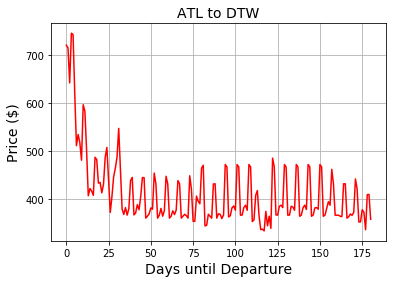

In [7]:
plt.plot(atltodtw['Days_to_Departure'], atltodtw['Average'], color='red')
plt.title('ATL to DTW', fontsize=14)
plt.xlabel('Days until Departure', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True)
plt.show()


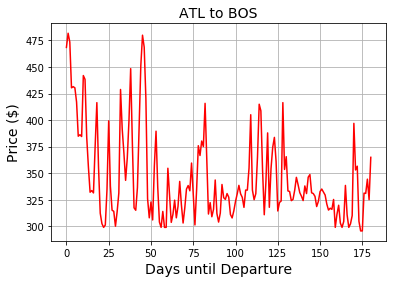

In [6]:
plt.plot(atltobos['Days_to_Departure'], atltobos['Average'], color='red')
plt.title('ATL to BOS', fontsize=14)
plt.xlabel('Days until Departure', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
plt.plot(atltoiad['Days_to_Departure'], atltoiad['Average'], color='red')
plt.title('ATL to IAD', fontsize=14)
plt.xlabel('Days until Departure', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
plt.plot(atltojfk['Days_to_Departure'], atltojfk['Average'], color='red')
plt.title('ATL to JFK', fontsize=14)
plt.xlabel('Days until Departure', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(df['Roundtrip'], df['WhentoBuy'], color='red')
plt.title('WhentoBuy VS Roundtrip', fontsize=14)
plt.xlabel('Roundtrip', fontsize=14) # 0 is Roundtrip False, 1 is Roundtrip True
plt.ylabel('When to Buy (Days)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(df['SeatClass'], df['WhentoBuy'], color='red')
plt.title('When to Buy VS Seat Class', fontsize=14)
plt.xlabel('Seat Class', fontsize=14) #0 is Economy, 1 is Business, 2 is First Class
plt.ylabel('When to Buy (Days)', fontsize=14)
plt.grid(True)
plt.show()

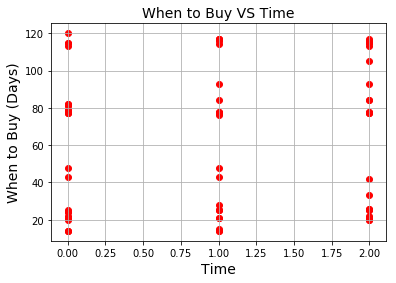

In [8]:
plt.scatter(df['Time'], df['WhentoBuy'], color='red')
plt.title('When to Buy VS Time', fontsize=14)
plt.xlabel('Time', fontsize=14) #0 is Morning, 1 is Afternoon, 2 is Evening
plt.ylabel('When to Buy (Days)', fontsize=14)
plt.grid(True)
plt.show()

In [3]:
df.describe()

,Miles,SeatClass,Roundtrip,Time,WhentoBuy
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,708.750000,1.000000,0.500000,1.000000,62.958333
std,161.376539,0.822226,0.503509,0.822226,36.959223
min,534.000000,0.000000,0.000000,0.000000,14.000000
25%,579.000000,0.000000,0.000000,0.000000,25.000000
50%,677.500000,1.000000,0.500000,1.000000,77.000000
75%,807.250000,2.000000,1.000000,2.000000,84.000000
max,946.000000,2.000000,1.000000,2.000000,120.000000


In [4]:
atltodtw.corr()

,Days_to_Departure,One-way Morning Economy,One-way Afternoon Economy,One-way Evening Economy,Roundtrip Morning Economy,Roundtrip Afternoon Economy,Roundtrip Evening Economy,One-way Morning Business,One-way Afternoon Business,One-way Evening Business,Roundtrip Morning Business,Roundtrip Afternoon Business,Roundtrip Evening Business,One-way Morning First Class,One-way Afternoon First Class,One-way Evening First Class,Roundtrip Morning First Class,Roundtrip Afternoon First Class,Roundtrip Evening First Class,Average
Days_to_Departure,1.000000,-0.471957,-0.482942,-0.427926,-0.344075,-0.365736,-0.363154,-0.494326,-0.518171,-0.506132,-0.385633,-0.405460,-0.413596,-0.494291,-0.518310,-0.503468,-0.386939,-0.411252,-0.407746,-0.455814
One-way Morning Economy,-0.471957,1.000000,0.928469,0.938918,0.787091,0.752741,0.758316,0.919052,0.907082,0.894330,0.735994,0.729567,0.713705,0.917515,0.907127,0.894664,0.733900,0.724880,0.710153,0.865310
One-way Afternoon Economy,-0.482942,0.928469,1.000000,0.942651,0.773023,0.804139,0.779684,0.885938,0.923151,0.893255,0.734829,0.760147,0.729844,0.884325,0.923207,0.893563,0.725407,0.762784,0.735480,0.876922
One-way Evening Economy,-0.427926,0.938918,0.942651,1.000000,0.764097,0.750513,0.774570,0.865071,0.888744,0.916265,0.701286,0.713571,0.716812,0.863373,0.888744,0.916702,0.698739,0.716524,0.722895,0.854618
Roundtrip Morning Economy,-0.344075,0.787091,0.773023,0.764097,1.000000,0.960246,0.973486,0.738201,0.743106,0.698187,0.961902,0.944759,0.932339,0.735567,0.743410,0.698314,0.959132,0.938706,0.929217,0.958728
Roundtrip Afternoon Economy,-0.365736,0.752741,0.804139,0.750513,0.960246,1.000000,0.967214,0.707519,0.764718,0.703778,0.922682,0.954844,0.924897,0.704714,0.764963,0.704018,0.916631,0.958114,0.927866,0.952444
Roundtrip Evening Economy,-0.363154,0.758316,0.779684,0.774570,0.973486,0.967214,1.000000,0.712954,0.735808,0.726894,0.945225,0.946356,0.964289,0.710348,0.736096,0.727071,0.944334,0.947911,0.969697,0.962570
One-way Morning Business,-0.494326,0.919052,0.885938,0.865071,0.738201,0.707519,0.712954,1.000000,0.903573,0.888074,0.768662,0.711235,0.699066,0.998494,0.903574,0.887605,0.765930,0.713436,0.693808,0.851645
One-way Afternoon Business,-0.518171,0.907082,0.923151,0.888744,0.743106,0.764718,0.735808,0.903573,1.000000,0.919808,0.728029,0.785273,0.726156,0.902480,0.999974,0.920133,0.722668,0.787059,0.724387,0.872977
One-way Evening Business,-0.506132,0.894330,0.893255,0.916265,0.698187,0.703778,0.726894,0.888074,0.919808,1.000000,0.691053,0.710505,0.749116,0.885388,0.919741,0.999494,0.688381,0.719170,0.751052,0.848097


In [9]:
df.corr()

,Miles,SeatClass,Roundtrip,Time,WhentoBuy
Miles,1.000000,0.000000,0.000000,0.000000,-0.142397
SeatClass,0.000000,1.000000,0.000000,0.000000,0.560806
Roundtrip,0.000000,0.000000,1.000000,0.000000,0.304633
Time,0.000000,0.000000,0.000000,1.000000,0.067204
WhentoBuy,-0.142397,0.560806,0.304633,0.067204,1.000000


## Set the columns for X and Y

In [10]:
X = df1[['Miles','SeatClass','Roundtrip','Time']] #F0r the X axis, we will keep all columns except for WhentoBuy
Y = df1['WhentoBuy'] #This column is what we are getting an estimation on


## Split Data into training and test datasets

In [11]:
# Modify Test Size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=.30,random_state=0)

In [12]:
# Check size of training and test datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50, 4) (50,)
(22, 4) (22,)


## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model=lm.fit(X_train,y_train)
predictions_train = lm.predict(X_train)
print ('Predictions: \n', predictions_train)

Predictions: 
 [ 32.72211721  55.4480416   85.18534071  47.68193263  15.83143919
  74.85573587  79.15343611  61.4799462   79.30361473 112.35914395
  42.85506381  73.42731602  83.60131496  93.73426157  16.51621366
  75.01134176 106.32723935 100.45094064  10.48430906  20.65830801
  98.56113039  59.74574183 104.59303499  22.54811826  66.71063694
  58.16171609  77.56941036  41.95581254  28.42441697 110.62493959
  41.27103807  80.88764047  68.29466269  49.41613699  34.45632157
  26.69021261  48.88696841  71.53750576  47.30294267  35.92390794
  46.09790688  49.57174288  22.39251237  37.50793368  73.12153151
  78.77444615  72.74254154  74.32656729  86.91954508  59.89592045]


In [14]:
# Predict using test dataset

predictions_test = lm.predict(X_test)
print ('Predictions: \n', predictions_test)


Predictions: 
 [ 47.98771714  62.94753256  73.27171013  43.53983828  61.36350681
 100.29533475  52.12981148  54.91887301  94.41903604 105.79807077
  27.89524839  68.97943716  67.39541142  47.83211125  88.38713144
  21.86334379  99.76616617  53.33484727  53.86401585  53.71383723
  80.35847189  85.33551933]


In [17]:
from sklearn import metrics
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_train, predictions_train))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_train, predictions_train))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_train,predictions_train))

Mean absolute error: 21.85
Mean squared error: 810.63
Root mean squared error: 28.47
R2 score : 0.47


In [18]:
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, predictions_test))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, predictions_test))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_test,predictions_test))

Mean absolute error: 22.31
Mean squared error: 701.35
Root mean squared error: 26.48
R2 score : 0.22


## Decision Tree Regression

In [19]:
#To train the tree, we'll instantiate the DecisionTreeRegressor class and call the fit method:

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train,y_train)

#To make predictions on the test set, ues the predict method:
tree_train = tree_reg.predict(X_train)
tree_test = tree_reg.predict(X_test)

In [20]:
print('Predictions (Training data): \n', tree_train)

Predictions (Training data): 
 [ 20.  25. 116. 120.  14.  77. 116.  25.  77. 113.  14.  84.  78.  48.
  21. 115. 114. 115.  21.  20. 115.  93. 117.  22.  24.  78.  78. 117.
  25. 117.  14.  77.  43.  25.  25.  25.  14.  82.  15.  81.  82.  21.
  24.  22. 115.  33.  28.  43.  77.  77.]


In [21]:
print('Predictions: \n', tree_test)

Predictions: 
 [115.  81.  82.  22.  81. 114.  78.  14. 115.  48.  14. 117.  84.  82.
  81.  14.  48.  15.  77. 120.  43.  77.]


In [22]:
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_train, tree_train))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_train, tree_train))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_train, tree_train)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_train,tree_train))

Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00
R2 score : 1.00


In [23]:
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, tree_test))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,tree_test))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, tree_test)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_test,tree_test))

Mean absolute error: 9.23
Mean squared error: 310.50
Root mean squared error: 17.62
R2 score : 0.65


## Polynomial Regression


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly1 = PolynomialFeatures(degree=2)
X_ = poly1.fit_transform(X_train)
X_test_ = poly1.fit_transform(X_test)

In [25]:
# Instantiate
poly = LinearRegression()
# Fit
poly.fit(X_, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
polytrain=poly.predict(X_)
print('Predictions (Training Data): \n', polytrain)

Predictions (Training Data): 
 [ 13.74032599  49.89835577  95.02701926  41.52653435   5.83831502
 108.79829837  87.27268611  51.15477545  77.65871798 125.69406402
  15.49208511  84.34869085  71.61298585  65.77327972  24.73221039
  97.85062455 115.11214574 108.53143252  25.00544351  25.10762639
  95.93277371  36.99794322  97.63809733  35.17073611  40.93493292
  64.17711368  62.61525803  66.15889622  27.62950472 110.05517978
  44.88708173 104.00570851  62.13314017  59.35369492  25.46656976
  14.06809677  12.97978375  64.32928905  43.61817503  61.76938005
  66.21891548  44.16890106  40.50419851  27.1648992   90.23011179
  58.43437697  44.32877553  64.28358811 109.92487749  76.64438345]


In [27]:
# Predict
polyresults=poly.predict(X_test_)
print('Predictions: \n', polyresults)

Predictions: 
 [ 8.12601712e+01  7.15211241e+01  8.12079132e+01  3.03110207e+01
  5.55324011e+01  1.15241986e+02  5.98421352e+01  2.11792412e+01
  8.53480536e+01  9.01114330e+01  4.68676186e+00  7.93299949e+01
  6.45846665e+01  8.23565136e+01  7.28764335e+01 -9.33409762e-02
  7.25864770e+01  5.30610272e+01  7.41445691e+01  3.39063594e+01
  7.71457949e+01  8.48212816e+01]


In [28]:
print("Training Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_train, polytrain))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_train, polytrain))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_train, polytrain)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_train,polytrain))

Training Data Metrics:
Mean absolute error: 17.75
Mean squared error: 543.22
Root mean squared error: 23.31
R2 score : 0.64


In [29]:
print("Testing Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, polyresults))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,polyresults))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, polyresults)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_test,polyresults))

Testing Data Metrics:
Mean absolute error: 16.03
Mean squared error: 454.59
Root mean squared error: 21.32
R2 score : 0.49


## Random Forest Regression


In [30]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

forest_train = forest_reg.predict(X_train)
forest_test = forest_reg.predict(X_test)

In [31]:
print('Predictions (Training Dataset): \n', forest_train)

Predictions (Training Dataset): 
 [ 22.   25.  112.1  99.9  15.7  80.8 112.1  31.8  81.1 105.9  14.   93.5
  78.   43.6  21.4 112.3 106.4 105.7  21.1  30.4 115.6  83.8 116.2  21.8
  23.8  78.   78.4 102.9  24.4 116.2  16.3  77.   40.1  34.5  24.4  23.5
  16.2  84.5  18.8  92.1  84.5  37.6  33.5  21.8 111.6  30.2  26.3  50.3
  77.   77.1]


In [32]:
print('Days in Advance to Book: \n', forest_test)

Days in Advance to Book: 
 [ 99.2  91.3  87.9  21.9  89.5 106.5  78.4  33.2  92.   66.3  17.7  98.3
  97.   84.3  88.3  18.4  52.4  21.7  77.5  91.5  64.7  80.7]


In [33]:
print("Training Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_train, forest_train))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_train, forest_train))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_train, forest_train)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_train,forest_train))

Training Data Metrics:
Mean absolute error: 4.10
Mean squared error: 38.55
Root mean squared error: 6.21
R2 score : 0.97


In [34]:
print("Testing Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, forest_test))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,forest_test))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, forest_test)))#A good model should have an RMSE value less than 180. 
print("R2 score : %.2f" % r2_score(y_test,forest_test))

Testing Data Metrics:
Mean absolute error: 10.17
Mean squared error: 178.10
Root mean squared error: 13.35
R2 score : 0.80


## Support Vector Regression


In [35]:
from sklearn.svm import SVR 
svrmodel = SVR()

In [36]:
svrmodel.fit(X_train,y_train)
svr_train =svrmodel.predict(X_train)
svr_test = svrmodel.predict(X_test)

C:\Users\The Pock Family\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
print('Predictions (Training Dataset): \n', svr_train)

Predictions (Training Dataset): 
 [65.31960898 61.48455099 68.57802459 66.23119093 56.70311255 63.45362038
 69.60448327 61.9662618  65.49836868 65.88784161 56.62415312 64.72564032
 68.41693088 56.55194304 61.22556703 63.53993091 65.97707304 64.76374634
 61.26610727 65.31960898 68.83709103 66.23119093 69.95520032 61.57086152
 56.36167291 67.80030084 69.44805701 63.15653041 61.11474212 68.83709103
 55.32869985 64.24176543 55.39207448 61.35031714 61.68734841 65.72233596
 56.76006695 68.41693088 55.31510821 62.70234044 67.80030084 61.71786302
 61.01394685 61.1953178  68.57802459 58.14331511 56.20439633 55.44927232
 64.43821236 64.01229747]


In [38]:
print('Days in Advance to Book: \n', svr_test)

Days in Advance to Book: 
 [63.43821236 62.52440986 64.48451167 61.27449613 63.71011926 64.87232055
 68.67435751 58.85681031 64.39388157 58.47340981 58.88433115 63.10760132
 64.48477705 62.99677641 63.53043431 56.83651689 56.51649103 57.71221338
 63.71413198 66.80488579 57.8844835  65.46910365]


In [39]:
print("Training Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_train, svr_train))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_train, svr_train))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_train, svr_train)))
print("R2 score : %.2f" % r2_score(y_train,svr_train))

Training Data Metrics:
Mean absolute error: 32.99
Mean squared error: 1301.09
Root mean squared error: 36.07
R2 score : 0.15


In [40]:
print("Testing Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, svr_test))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,svr_test))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, svr_test)))
print("R2 score : %.2f" % r2_score(y_test,svr_test))

Testing Data Metrics:
Mean absolute error: 24.74
Mean squared error: 811.47
Root mean squared error: 28.49
R2 score : 0.10


## K Nearest Neighbor Regression


In [41]:
from sklearn.neighbors import KNeighborsRegressor
clf=KNeighborsRegressor(2)
clf.fit(X_train,y_train)
clf_train=clf.predict(X_train)
clf_test=clf.predict(X_test)

In [42]:
print('Predictions (Training Dataset): \n', clf_train)

Predictions (Training Dataset): 
 [ 56.5  25.  116.   70.   14.   77.  116.   25.   95.5 113.5  14.   99.5
  78.   36.   21.  115.   95.5  99.5  21.   70.  116.   56.5 116.5  21.5
  36.   49.   78.   69.   25.  116.5  14.   51.   28.5  25.   25.   22.5
  14.   98.5  14.5  51.   51.   68.   24.5  21.5 117.5  30.5  26.   43.
  51.   51. ]


In [43]:
print('Days in Advance to Book: \n', clf_test)

Days in Advance to Book: 
 [ 99.5  51.5  77.   21.   99.   95.5  97.   28.5  99.5  30.5  14.5 116.
 100.5  50.5  99.   14.   38.   24.   51.  118.   28.5  95. ]


In [44]:
print("Training Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_train, clf_train))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_train, clf_train))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_train, clf_train)))
print("R2 score : %.2f" % r2_score(y_train,clf_train))

Training Data Metrics:
Mean absolute error: 11.46
Mean squared error: 377.37
Root mean squared error: 19.43
R2 score : 0.75


In [45]:
print("Testing Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, clf_test))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,clf_test))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, clf_test)))
print("R2 score : %.2f" % r2_score(y_test,clf_test))

Testing Data Metrics:
Mean absolute error: 17.14
Mean squared error: 531.75
Root mean squared error: 23.06
R2 score : 0.41


## Logistic Regression 

In [46]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
logreg_train=logreg.predict(X_train)
logreg_test=logreg.predict(X_test)

C:\Users\The Pock Family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\The Pock Family\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
print('Predictions (Training Dataset): \n', logreg_train)

Predictions (Training Dataset): 
 [ 25  25  77  14  14 115 115  25  78  77  14  78  78 115  21 115  77 115
  14  14 115  25 115  21  82  78  78  21  25  77  14 115 115  14  25  25
  25  82  21  14  14  25  14  14 115  78 115 115  77  78]


In [48]:
print('Days in Advance to Book: \n', logreg_test)

Days in Advance to Book: 
 [ 21  14  82  21 115 115  77  25 115 115  25 115 115  82 115  21 115  78
  77  25 115  78]


In [49]:
print("Training Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_train, logreg_train))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_train, logreg_train))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_train, logreg_train)))
print("R2 score : %.2f" % r2_score(y_train,logreg_train))

Training Data Metrics:
Mean absolute error: 22.28
Mean squared error: 1425.80
Root mean squared error: 37.76
R2 score : 0.07


In [50]:
print("Testing Data Metrics:")
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, logreg_test))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,logreg_test))
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_test, logreg_test)))
print("R2 score : %.2f" % r2_score(y_test,logreg_test))

Testing Data Metrics:
Mean absolute error: 25.91
Mean squared error: 1396.45
Root mean squared error: 37.37
R2 score : -0.55


## Creating a GUI

In [ ]:
# tkinter GUI
import tkinter as tk 
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from datetime import datetime, timedelta

root= tk.Tk()
root.title("Capstone Project: When to Buy Airline Tickets")
canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn

label6 = tk.Label(root, text='WHEN TO BUY AIRFARE PREDICTION MODEL')
label6.config(width=400)
label6.config(font=("Arial", 24))
canvas1.create_window(270, 30, window=label6)

# New_Miles label and input box

label7 = tk.Label(root, text='Departure Date (MM/DD/YYYY): ')
canvas1.create_window(70, 70, window=label7)
label7.config(font=("Arial", 14))
entry7 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 70, window=entry7)

# New_Miles label and input box

label1 = tk.Label(root, text='Choose Destination: ')
label1.config(font=("Arial", 14))
canvas1.create_window(70, 100, window=label1)
var = StringVar()
choices={'ATL to BOS':971, 'ATL to DTW':594, 'ATL to JFK':761, 'ATL to IAD':534}
entry1=OptionMenu(root, var, *choices)
var.set('ATL to BOS')
canvas1.create_window(270, 100, window=entry1)

# New_SeatClass label and input box
label2 = tk.Label(root, text='Choose Seat Class: ')
label2.config(font=("Arial", 14))
canvas1.create_window(70, 130, window=label2)
var2 = StringVar()
choices2={'Economy':0, 'Business':1, 'First-Class':2}
entry2=OptionMenu(root, var2, *choices2)
var2.set('Economy')
canvas1.create_window(270, 130, window=entry2)

# New_Roundtrip label and input box
label3 = tk.Label(root, text='Roundtrip: ')
label3.config(font=("Arial", 14))
canvas1.create_window(70, 160, window=label3)
var3 = StringVar()
choices3={'No':0, 'Yes':1}
entry3=OptionMenu(root, var3, *choices3)
var3.set('No')
canvas1.create_window(270, 160, window=entry3)

# New_Time label and input box
label4 = tk.Label(root, text='Departure Time: ')
label4.config(font=("Arial", 14))
canvas1.create_window(70, 190, window=label4)
var4 = StringVar()
choices4={'Morning':0, 'Afternoon':1, 'Evening':2}
entry4=OptionMenu(root, var4, *choices4)
var4.set('Morning')
canvas1.create_window(270, 190, window=entry4)


def values(): 
    global New_Date #our 1st input variable
    New_Date = (entry7.get())
    date_format = '%m/%d/%Y'
    try:
        date_obj = datetime.strptime(New_Date, date_format)
        print(date_obj)
    except ValueError:
        print("Incorrect data format, should be MM-DD-YYYY")
    
    global New_Miles #our 1st input variable
    New_Miles = choices[var.get()]
    
    global New_SeatClass #our 2nd input variable
    New_SeatClass = choices2[var2.get()] 
    global New_Roundtrip #our 3rd input variable
    New_Roundtrip = choices3[var3.get()] 
    global New_Time #our 4th input variable
    New_Time = choices4[var4.get()] 
    Input = [[New_Miles, New_SeatClass, New_Roundtrip, New_Time]]
    Prediction_result  = ('Prediction: ', forest_reg.predict(Input), 'Days to Buy Before Departure', )
    label_Prediction = tk.Label(root, text= Prediction_result, bg='red')
    label_Prediction.config(font=("Arial", 18))
    canvas1.create_window(700, 230, window=label_Prediction)
    
    y= int(forest_reg.predict(Input))
    x=y

    New_Date =datetime.strptime(New_Date, "%m/%d/%Y")
    end = New_Date - timedelta(days=x) 
    date_result= ('Predicted Purchase Date: ', end)
    date_Prediction = tk.Label(root, text=date_result, bg='yellow')
    date_Prediction.config(font=("Arial", 18))
    canvas1.create_window(700, 260, window=date_Prediction)
    
    
def ExitApplication():
    MsgBox = tk.messagebox.askquestion ('Exit Application','Are you sure you want to exit the application',icon = 'warning')
    if MsgBox == 'yes':
       root.destroy()
    else:
        tk.messagebox.showinfo('Return','You will now return to the application screen')
        
button1 = tk.Button (root, text='Predict When to Buy',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 230, window=button1)

button2 = tk.Button (root, text='Exit Application',command=ExitApplication, bg='orange') 
canvas1.create_window(270, 260, window=button2)
 

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(atltodtw['Days_to_Departure'].astype(float),atltodtw['Average'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.set_ylabel('Price ($)')
ax3.set_xlabel('Days until Departure')
ax3.set_title('ATL to DTW')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(atltoiad['Days_to_Departure'].astype(float),atltoiad['Average'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.set_ylabel('Price ($)')
ax4.set_xlabel('Days until Departure')
ax4.set_title('ATL to IAD')

#plot 3rd scatter 
figure5 = plt.Figure(figsize=(5,4), dpi=100)
ax5 = figure5.add_subplot(111)
ax5.scatter(atltobos['Days_to_Departure'].astype(float),atltobos['Average'].astype(float), color = 'b')
scatter5 = FigureCanvasTkAgg(figure5, root) 
scatter5.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax5.set_ylabel('Price ($)')
ax5.set_xlabel('Days until Departure')
ax5.set_title('ATL to BOS')

#plot 4th scatter 
figure6 = plt.Figure(figsize=(5,4), dpi=100)
ax6 = figure6.add_subplot(111)
ax6.scatter(atltojfk['Days_to_Departure'].astype(float),atltojfk['Average'].astype(float), color = 'y')
scatter6 = FigureCanvasTkAgg(figure6, root) 
scatter6.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax6.set_ylabel('Price ($)')
ax6.set_xlabel('Days until Departure')
ax6.set_title('ATL to JFK')

root.mainloop()

2019-05-25 00:00:00
